In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv("/home/growlt199/Downloads/manufacturing_project/data/flight_rates.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [7]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [8]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

# **Data Details:-**

*   **airline**: refers to the company or carrier that operates the flight.6 unique values are,
    * **SpiceJet**
    * **AirAsia**
    * **Vistara**
    * **GO_FIRST**
    * **Indigo**
    * **Air_India**

*   **flight**: refers to company code + Flight number, A numeric code assigned by the airline to identify the specific flight, ranging from one to four digits. **It have total 1561 unique flight are there, and total 1254 unique flight number.**

*   **source_city**: The starting city name from where the flight originates. There are 6 unique cities,
    * **Delhi**
    * **Mumbai**
    * **Bangalore**
    * **Kolkata**
    * **Hyderabad**
    * **Chennai**

*  **destination_city**: city name where the flight is scheduled to arrive. There are 6 unique cities,
    * **Kolkata**
    * **Hyderabad**
    * **Chennai**
    * **Delhi**
    * **Mumbai**
    * **Bangalore**

* **departure_time**: The scheduled time of departure of the flight from the source_city.
    * **Evening**
    * **Early_Morning**
    * **Morning**
    * **Afternoon**
    * **Night**
    * **Late_Night**

* **stops**: The number of stops the flight makes on its way to the destination_city.
    * **zero**
    * **one** 
    * **two_or_more**

* **arrival_time**: The scheduled time of arrival of the flight at the destination_city.
    * **Evening**
    * **Early_Morning**
    * **Morning**
    * **Afternoon**
    * **Night**
    * **Late_Night**

* **class**: The class of the flight, such as  
    *  **Economy**
    *  **business**

* **duration**: **The total duration(float numbers) in hours** of the flight from the departure_time to the arairline, class, availability, and other factorsrival_time.

* **days_left**:The number of days between the date of the flight search and the departure date of the flight. **integer number varies 1 to 49.**

* **price**: The cost of the flight ticket, which may vary based on the all the above features.
   





In [9]:
df.shape

(300153, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [12]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


so from this data describtion we can say duration have outlier



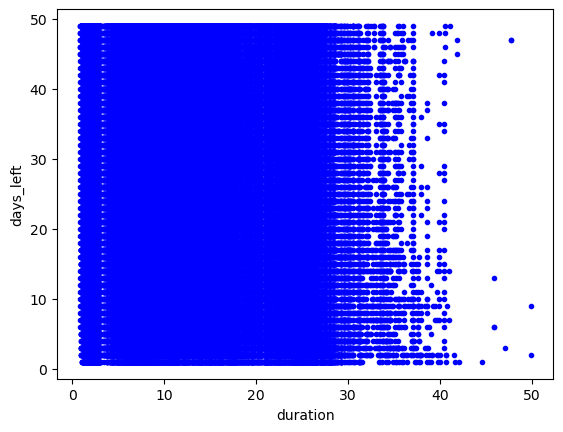

In [13]:
plt.xlabel("duration")
plt.ylabel("days_left")
plt.scatter(df['duration'],df['days_left'],color='blue',marker='.')

In [14]:
df['price'].mean()+ 3*df['price'].std()

88982.96262136086

In [15]:
df2=df[df['price'] < df['price'].mean()+ 3*df['price'].std()]
df2.shape

(299551, 11)

In [16]:
df[df['price'] > df['price'].mean()+ 3*df['price'].std()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206787,Vistara,UK-707,Delhi,Evening,one,Night,Mumbai,Business,26.83,2,95657
206878,Vistara,UK-819,Delhi,Afternoon,one,Night,Mumbai,Business,7.58,3,91575
210742,Vistara,UK-747,Delhi,Early_Morning,one,Afternoon,Mumbai,Business,6.50,38,90281
210743,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,38,90281
215854,Vistara,UK-985,Delhi,Evening,one,Morning,Kolkata,Business,13.83,1,90057
...,...,...,...,...,...,...,...,...,...,...,...
299018,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.17,25,89537
299407,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,33,89537
299458,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.17,34,89537
299700,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,39,89537


In [17]:
df2[df2['duration'] > df2['duration'].mean()+ 3*df2['duration'].std()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10540,Air_India,AI-9887,Delhi,Early_Morning,two_or_more,Evening,Bangalore,Economy,36.92,4,12321
20464,Vistara,UK-815,Delhi,Morning,two_or_more,Evening,Kolkata,Economy,35.83,3,17462
20467,Vistara,UK-801,Delhi,Morning,two_or_more,Evening,Kolkata,Economy,34.83,3,18927
29417,Air_India,AI-481,Delhi,Morning,two_or_more,Night,Hyderabad,Economy,36.92,7,10474
29418,Air_India,AI-435,Delhi,Early_Morning,two_or_more,Night,Hyderabad,Economy,39.67,7,10474
...,...,...,...,...,...,...,...,...,...,...,...
283030,Vistara,UK-860,Hyderabad,Early_Morning,one,Night,Kolkata,Business,37.92,2,64733
293606,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Business,45.83,6,51928
295740,Air_India,AI-509,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Business,34.50,46,54986
295952,Vistara,UK-836,Chennai,Morning,one,Night,Kolkata,Business,34.00,2,68963


In [18]:
df['days_left'].mean()+ 3*df['days_left'].std()

66.68776197164236

In [19]:
df[df['days_left'] > df['days_left'].mean()+ 3*df['days_left'].std()].shape


(0, 11)

In [20]:
df['duration'].mean()+ 3*df['duration'].std()

33.797012527072866

In [21]:
df4=df2[df2['duration'] < df2['duration'].mean()+ 3*df2['duration'].std()]
df4.shape

(298829, 11)

In [22]:
df2['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [23]:
for i in df2['source_city'].unique():
    print(i, df2[df2['source_city'] == i].shape, 'avg duration = ' ,df2[df2['source_city'] == i]['duration'].mean())

Delhi (61261, 11) avg duration =  11.511785964969523
Mumbai (60781, 11) avg duration =  11.881394843782925
Bangalore (52014, 11) avg duration =  12.027782904602732
Kolkata (46142, 11) avg duration =  13.253647002731027
Hyderabad (40764, 11) avg duration =  12.266537876557424
Chennai (38589, 11) avg duration =  12.836705537846928


In [24]:
for i in df2['stops'].unique():
  print(i, df2[df2['stops'] == i].shape, 'avg duration = ' ,df2[df2['stops'] == i]['duration'].mean())
  df_one = df2[df2['stops'] == i]

zero (36004, 11) avg duration =  2.1913240195534263
one (250327, 11) avg duration =  13.495995318122361
two_or_more (13220, 11) avg duration =  15.32751815431194


In [25]:
df_one.shape

(13220, 11)

In [26]:
for i in df_one['source_city'].unique():
    print(i, df_one[df_one['source_city'] == i].shape, 'avg duration = ' ,df_one[df_one['source_city'] == i]['duration'].mean())

Delhi (2871, 11) avg duration =  14.935667014977328
Mumbai (2326, 11) avg duration =  14.202063628546943
Bangalore (2191, 11) avg duration =  17.18210406207192
Kolkata (2763, 11) avg duration =  15.388689829895041
Hyderabad (1368, 11) avg duration =  14.624305555555484
Chennai (1701, 11) avg duration =  15.605232216343156


In [27]:
for i in df_one['destination_city'].unique():
    print(i, df_one[df_one['destination_city'] == i].shape, 'avg duration = ' ,df_one[df_one['destination_city'] == i]['duration'].mean())

Mumbai (1323, 11) avg duration =  16.41155706727134
Bangalore (2673, 11) avg duration =  13.634242424242387
Kolkata (3158, 11) avg duration =  14.346861937935389
Hyderabad (2059, 11) avg duration =  17.603268576978973
Chennai (3222, 11) avg duration =  16.619013035381727
Delhi (785, 11) avg duration =  11.941388535031852


In [28]:
for i in df_one['departure_time'].unique():
    print(i, df_one[df_one['departure_time'] == i].shape, 'avg duration = ' ,df_one[df_one['departure_time'] == i]['duration'].mean())

Morning (3926, 11) avg duration =  14.59159704533873
Early_Morning (3670, 11) avg duration =  14.500008174386787
Afternoon (2735, 11) avg duration =  15.113714808043834
Night (503, 11) avg duration =  17.35153081510936
Evening (2346, 11) avg duration =  17.797024722932616
Late_Night (40, 11) avg duration =  7.8125


In [29]:
df_one[df_one['departure_time'] == 'Night']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10342,Vistara,UK-871,Delhi,Night,two_or_more,Evening,Bangalore,Economy,21.17,3,15336
10344,Vistara,UK-871,Delhi,Night,two_or_more,Night,Bangalore,Economy,24.33,3,15336
11625,Air_India,AI-479,Delhi,Night,two_or_more,Evening,Bangalore,Economy,21.25,10,15767
20188,Air_India,AI-479,Delhi,Night,two_or_more,Night,Kolkata,Economy,26.42,1,14003
20439,Air_India,AI-479,Delhi,Night,two_or_more,Night,Kolkata,Economy,26.42,3,13688
...,...,...,...,...,...,...,...,...,...,...,...
224978,Air_India,AI-883,Delhi,Night,two_or_more,Morning,Chennai,Business,12.92,49,70323
241486,Air_India,AI-619,Mumbai,Night,two_or_more,Evening,Chennai,Business,22.75,1,75840
295951,Vistara,UK-838,Chennai,Night,two_or_more,Night,Kolkata,Business,23.67,2,68963
295954,Vistara,UK-838,Chennai,Night,two_or_more,Morning,Kolkata,Business,12.50,2,69489


In [30]:
for i in df_one['arrival_time'].unique():
    print(i, df_one[df_one['arrival_time'] == i].shape, 'max duration = ' ,df_one[df_one['arrival_time'] == i]['duration'].max())

Evening (3983, 11) max duration =  49.83
Night (4588, 11) max duration =  41.83
Morning (2361, 11) max duration =  45.83
Early_Morning (634, 11) max duration =  40.75
Afternoon (998, 11) max duration =  33.58
Late_Night (656, 11) max duration =  40.0
Evening (3983, 11) max duration =  49.83
Night (4588, 11) max duration =  41.83
Morning (2361, 11) max duration =  45.83
Early_Morning (634, 11) max duration =  40.75
Afternoon (998, 11) max duration =  33.58
Late_Night (656, 11) max duration =  40.0


In [31]:
df_one[df_one['arrival_time'] == 'Morning']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
10054,Vistara,UK-747,Delhi,Early_Morning,two_or_more,Morning,Bangalore,Economy,26.33,1,17302
10055,Vistara,UK-747,Delhi,Early_Morning,two_or_more,Morning,Bangalore,Economy,28.25,1,17302
10073,Vistara,UK-747,Delhi,Early_Morning,two_or_more,Morning,Bangalore,Economy,26.33,1,18909
10074,Vistara,UK-747,Delhi,Early_Morning,two_or_more,Morning,Bangalore,Economy,28.25,1,18909
10081,Vistara,UK-705,Delhi,Early_Morning,two_or_more,Morning,Bangalore,Economy,25.33,1,20767
...,...,...,...,...,...,...,...,...,...,...,...
283074,Vistara,UK-860,Hyderabad,Early_Morning,two_or_more,Morning,Kolkata,Business,26.75,3,76314
293606,Air_India,AI-429,Chennai,Afternoon,two_or_more,Morning,Bangalore,Business,45.83,6,51928
295799,Air_India,AI-545,Chennai,Evening,two_or_more,Morning,Bangalore,Business,16.00,47,52475
295954,Vistara,UK-838,Chennai,Night,two_or_more,Morning,Kolkata,Business,12.50,2,69489


above raw are outlier, we will drop them because by the one stop it take 47 hours

In [32]:
df_one[df_one['arrival_time'] == 'Afternoon']

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
11398,AirAsia,I5-787,Delhi,Early_Morning,two_or_more,Afternoon,Bangalore,Economy,8.17,9,11940
11436,AirAsia,I5-783,Delhi,Early_Morning,two_or_more,Afternoon,Bangalore,Economy,6.75,9,16210
11532,AirAsia,I5-787,Delhi,Early_Morning,two_or_more,Afternoon,Bangalore,Economy,8.17,10,10672
11639,AirAsia,I5-783,Delhi,Early_Morning,two_or_more,Afternoon,Bangalore,Economy,6.75,10,19505
11810,AirAsia,I5-783,Delhi,Early_Morning,two_or_more,Afternoon,Bangalore,Economy,6.75,11,10672
...,...,...,...,...,...,...,...,...,...,...,...
289005,Vistara,UK-828,Chennai,Early_Morning,two_or_more,Afternoon,Delhi,Business,7.50,26,53552
289007,Vistara,UK-828,Chennai,Early_Morning,two_or_more,Afternoon,Delhi,Business,5.67,26,57920
289008,Vistara,UK-828,Chennai,Early_Morning,two_or_more,Afternoon,Delhi,Business,7.08,26,57920
289032,Vistara,UK-828,Chennai,Early_Morning,two_or_more,Afternoon,Delhi,Business,8.67,26,64729


from above last  raw is outlier, we will drop them because by the one stop it take 44.5 hours

In [33]:
for i in df_one['class'].unique():
    print(i, df_one[df_one['class'] == i].shape, 'max duration = ' ,df_one[df_one['class'] == i]['duration'].max())

Economy (12203, 11) max duration =  49.83
Business (1017, 11) max duration =  45.83


In [ ]:
df2.head()

In [ ]:
plt.xlabel("duration")
plt.ylabel("days_left")
plt.scatter(df['duration'],df['days_left'],color='blue',marker='.')

we can clearly see in above picture right some point look outliers

In [34]:
#take hard thresold to remove outliers 
#df3=df[df['duration'] > 43]
#df3.shape

In [35]:
df4

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [36]:
#df4 = df[df['duration'] < 43]

In [37]:
df4.shape

(298829, 11)

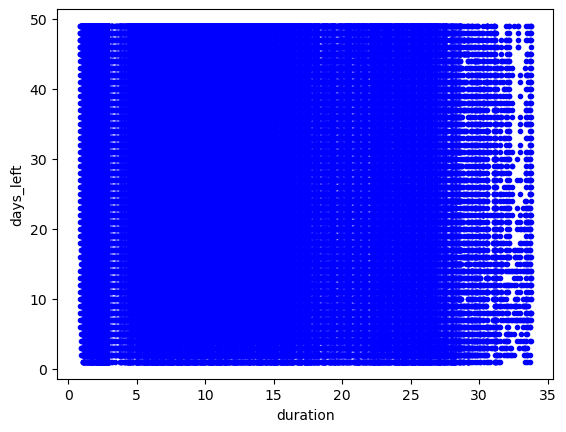

In [38]:
plt.xlabel("duration")
plt.ylabel("days_left")
plt.scatter(df4['duration'],df4['days_left'],color='blue',marker='.')

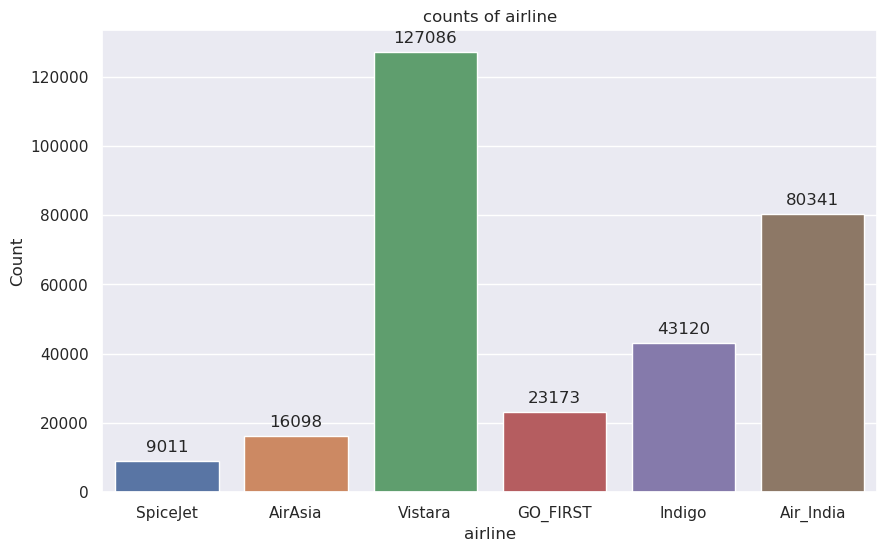

In [39]:
sn.set(style="darkgrid")

# Calculate percentage of each category
counts = df4["airline"].value_counts(normalize=True) * 100

# Create countplot with percentages displayed on top of each bar
fig, ax = plt.subplots(figsize=(10,6))  # Set figure size
sn.countplot(x='airline',data=df4)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Set labels
ax.set_xlabel("airline")
ax.set_ylabel("Count")
ax.set_title("counts of airline")

# Show plot
plt.show()

<Axes: xlabel='airline', ylabel='price'>

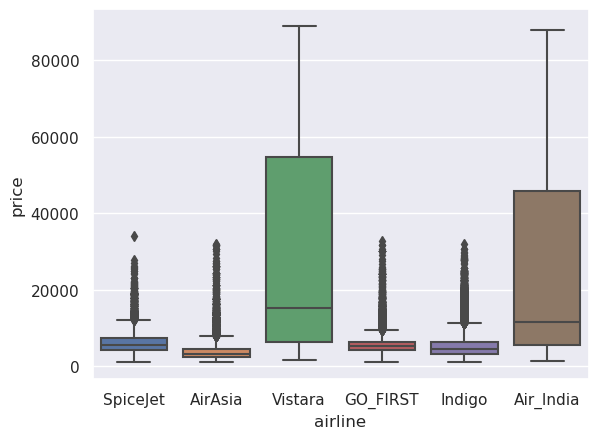

In [40]:
sn.boxplot(x='airline',y='price',data= df4)

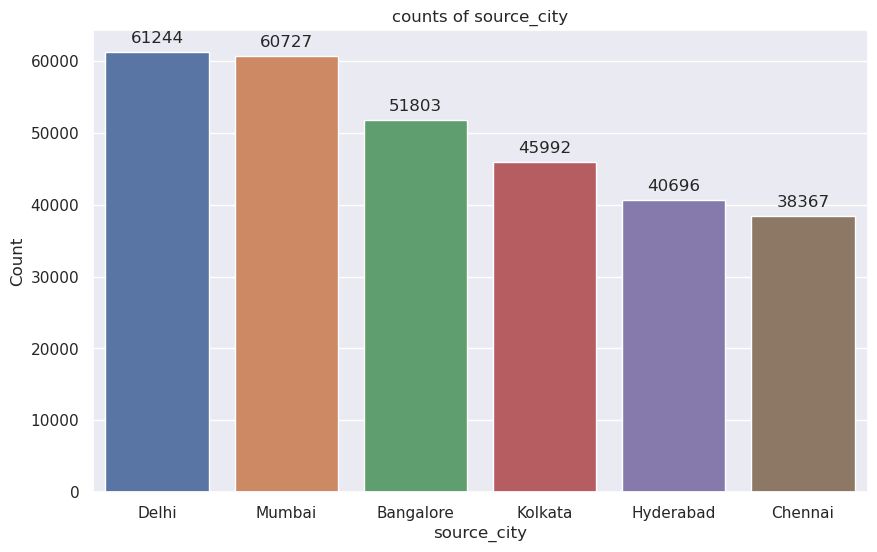

In [41]:
sn.set(style="darkgrid")

# Calculate percentage of each category
counts = df4["source_city"].value_counts(normalize=True) * 100

# Create countplot with percentages displayed on top of each bar
fig, ax = plt.subplots(figsize=(10,6))  # Set figure size
sn.countplot(x='source_city',data=df4)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Set labels
ax.set_xlabel("source_city")
ax.set_ylabel("Count")
ax.set_title("counts of source_city")

# Show plot
plt.show()

<Axes: xlabel='source_city', ylabel='price'>

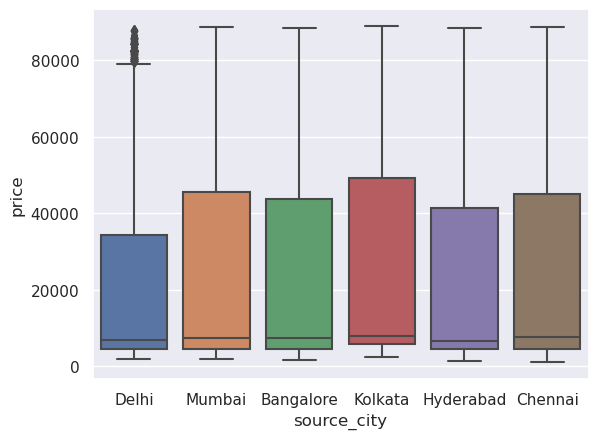

In [42]:
sn.boxplot(x='source_city',y='price',data= df4)

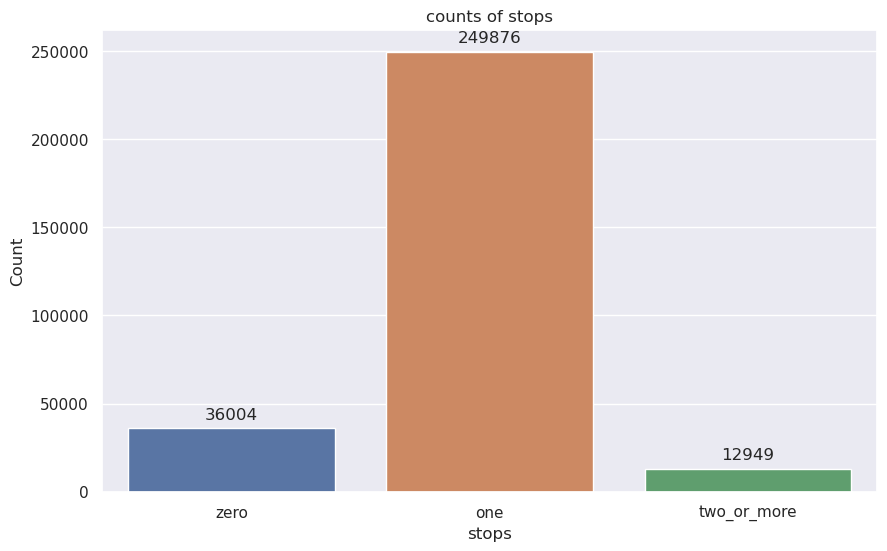

In [43]:
sn.set(style="darkgrid")

# Calculate percentage of each category
counts = df4["stops"].value_counts(normalize=True) * 100

# Create countplot with percentages displayed on top of each bar
fig, ax = plt.subplots(figsize=(10,6))  # Set figure size
sn.countplot(x='stops',data=df4)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Set labels
ax.set_xlabel("stops")
ax.set_ylabel("Count")
ax.set_title("counts of stops")

# Show plot
plt.show()

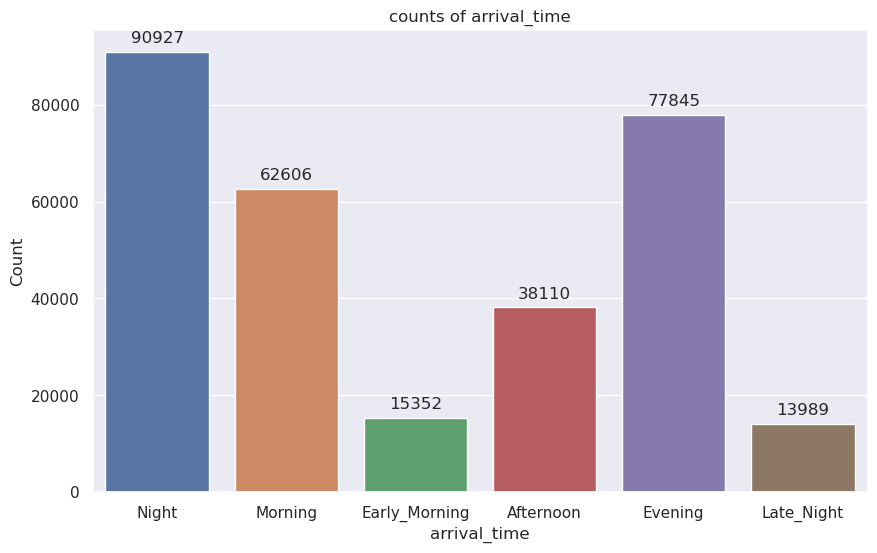

In [44]:
#sn.countplot(x='class',data=df4)
sn.set(style="darkgrid")

# Calculate percentage of each category
counts = df4["arrival_time"].value_counts(normalize=True) * 100

# Create countplot with percentages displayed on top of each bar
fig, ax = plt.subplots(figsize=(10,6))  # Set figure size
sn.countplot(x='arrival_time',data=df4)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Set labels
ax.set_xlabel("arrival_time")
ax.set_ylabel("Count")
ax.set_title("counts of arrival_time")

# Show plot
plt.show()

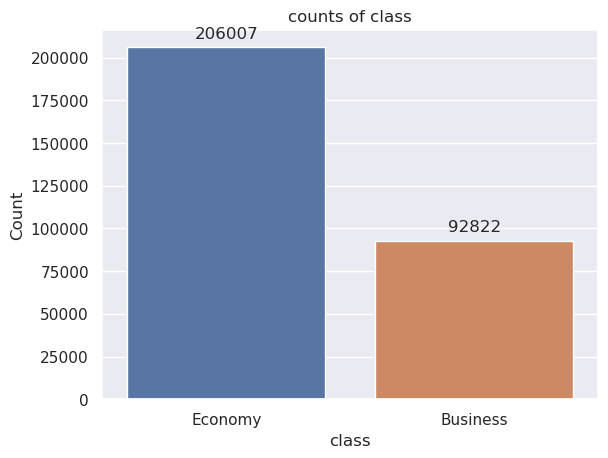

In [45]:
#sn.countplot(x='class',data=df4)
sn.set(style="darkgrid")

# Calculate percentage of each category
counts = df4["class"].value_counts(normalize=True) * 100

# Create countplot with percentages displayed on top of each bar
ax = sn.countplot(x='class',data=df4)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Set labels
ax.set_xlabel("class")
ax.set_ylabel("Count")
ax.set_title("counts of class")

# Show plot
plt.show()

In [46]:
df4.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<Axes: >

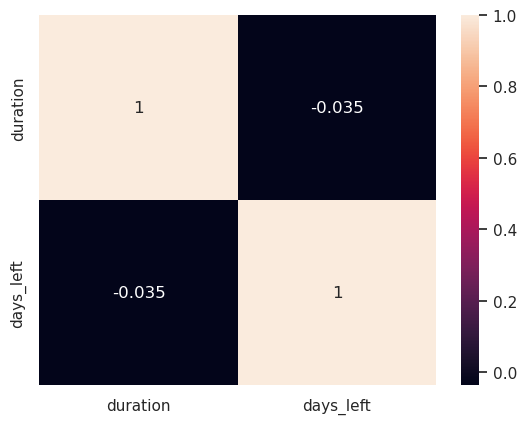

In [47]:
#correlation matrix of data
sn.heatmap(df4.iloc[:,:-1].corr(),annot=True)

In [48]:
df4['flight'].apply(lambda y: y.split('-')[0] ).unique()

array(['SG', 'I5', 'UK', 'G8', '6E', 'AI'], dtype=object)

In [49]:
df4['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [50]:
df4['flight'].apply(lambda y: y.split('-')[1] ).nunique()

1254

In [51]:
df4['flight'].nunique()

1561

# **Day2: EDA**

In [52]:
df4['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [53]:
#create bin to see figure proparly 
bins = pd.cut(df4['days_left'], bins=10, labels=[f'{i}-{i+4}' for i in range(1, 50, 5)])

In [54]:
#to create new datafrme analyzing source city wise data
df_Bangalore = df4[df4['source_city'] =='Bangalore'].groupby(bins).mean()
df_Mumbai = df4[df4['source_city'] =='Mumbai'].groupby(bins).mean()
df_Delhi = df4[df4['source_city'] =='Delhi'].groupby(bins).mean()
df_Kolkata = df4[df4['source_city'] =='Kolkata'].groupby(bins).mean()
df_Hyderabad = df4[df4['source_city'] =='Hyderabad'].groupby(bins).mean()
df_Chennai = df4[df4['source_city'] =='Chennai'].groupby(bins).mean()

In [55]:
df_Bangalore.index

CategoricalIndex(['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35',
                  '36-40', '41-45', '46-50'],
                 categories=['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', ...], ordered=True, dtype='category', name='days_left')

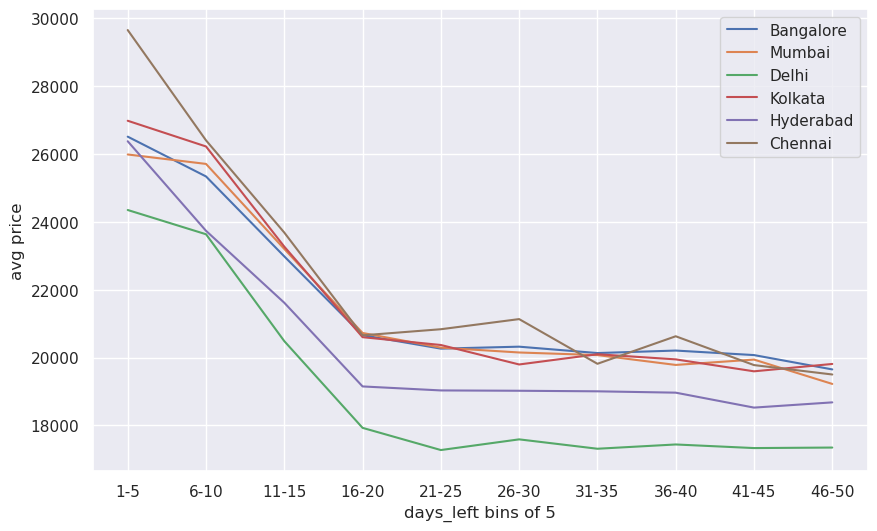

In [56]:

# Set figure size
plt.figure(figsize=(10,6))

#plot days_left bins vs price in below figure to see relation
plt.plot(df_Bangalore.index,df_Bangalore['price'], label = "Bangalore")
plt.plot(df_Mumbai.index,df_Mumbai['price'], label = "Mumbai")
plt.plot(df_Delhi.index,df_Delhi['price'], label = "Delhi")
plt.plot(df_Kolkata.index,df_Kolkata['price'], label = "Kolkata")
plt.plot(df_Hyderabad.index,df_Hyderabad['price'], label = "Hyderabad")
plt.plot(df_Chennai.index,df_Chennai['price'], label = "Chennai")
plt.xlabel("days_left bins of 5")
plt.ylabel("avg price")
plt.legend()
plt.show()

In [57]:
#we have total 6 source city and 6 destination city so total 30 combination are there i merge both sorce and destination city column 
df4['travel_route'] = df4['source_city'] + '-' +df4['destination_city']

/tmp/ipykernel_11670/2275995223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['travel_route'] = df4['source_city'] + '-' +df4['destination_city']


In [58]:
df4.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,travel_route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai


In [59]:
# group by 'source city' column and calculate the statistics
df_stats_source = df4.groupby('source_city')['price'].agg(['mean', 'std', 'min', 'max']).reset_index()

In [60]:
df_stats_source

,source_city,mean,std,min,max
0,Bangalore,21416.696523,23096.321874,1603,88480
1,Chennai,21840.356270,23275.694048,1105,88787
2,Delhi,18848.839462,20743.840402,1998,88019
3,Hyderabad,20092.934760,21620.753509,1543,88522
4,Kolkata,21429.833993,22984.934797,2436,88950
5,Mumbai,21348.481417,23197.613499,1890,88813


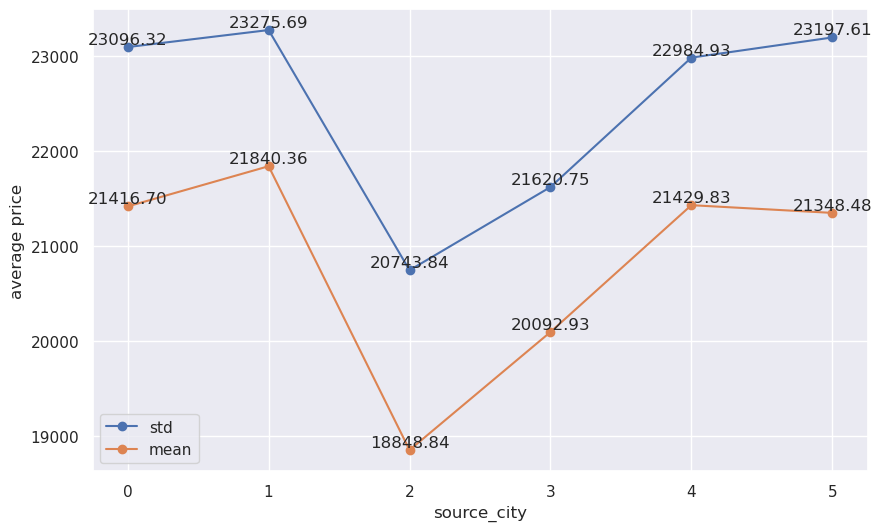

In [61]:
# Set figure size
plt.figure(figsize=(10,6))

plt.plot(df_stats_source.index,df_stats_source['std'],'o-', label = "std")

# add data point values to the plot
for j in df_stats_source['std']:
    plt.text(df_stats_source.loc[df_stats_source['std'] == j].index[0], j, f'{j:.2f}', ha='center', va='bottom')

plt.plot(df_stats_source.index,df_stats_source['mean'],'o-', label = "mean")

# add data point values to the plot
for j in df_stats_source['mean']:
    plt.text(df_stats_source.loc[df_stats_source['mean'] == j].index[0], j, f'{j:.2f}', ha='center', va='bottom')

# set axis labels and title
plt.xlabel("source_city")
plt.ylabel("average price")
plt.legend()

# show the plot
plt.show()


In [62]:
# group by 'city' column and calculate the statistics
df_stats_destination= df4.groupby('destination_city')['price'].agg(['mean', 'std', 'min', 'max'])

<Figure size 1000x600 with 0 Axes>

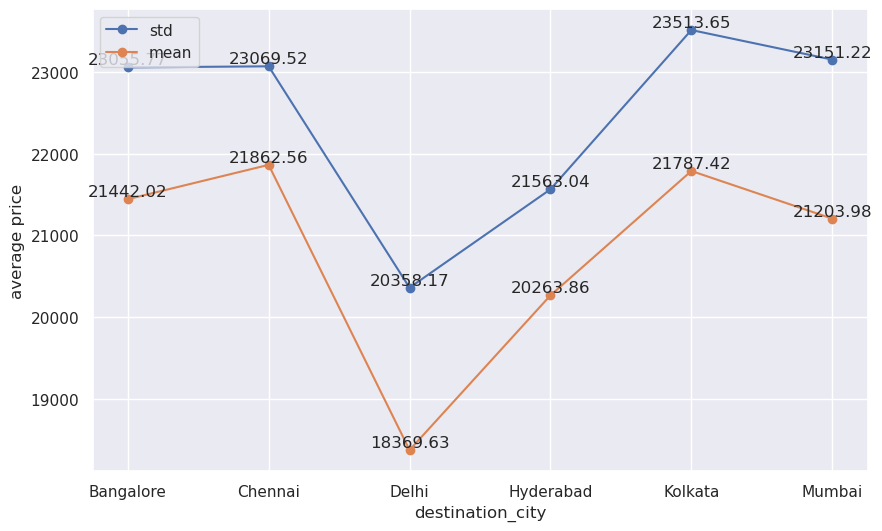

In [63]:
# Set figure size
plt.figure(figsize=(10,6))

plt.plot# Set figure size
plt.figure(figsize=(10,6))

plt.plot(df_stats_destination.index,df_stats_destination['std'],'o-', label = "std")

# add data point values to the plot
for j in df_stats_destination['std']:
    plt.text(df_stats_destination.loc[df_stats_destination['std'] == j].index[0], j, f'{j:.2f}', ha='center', va='bottom')

plt.plot(df_stats_destination.index,df_stats_destination['mean'],'o-', label = "mean")

# add data point values to the plot
for j in df_stats_destination['mean']:
    plt.text(df_stats_destination.loc[df_stats_destination['mean'] == j].index[0], j, f'{j:.2f}', ha='center', va='bottom')

# set axis labels and title
plt.xlabel("destination_city")
plt.ylabel("average price")
plt.legend()

# show the plot
plt.show()

In [64]:
# group by 'route' column and calculate the statistics
df_stats = df4.groupby('travel_route')['price'].agg(['mean', 'std', 'min', 'max']).reset_index()

In [65]:
df_stats

,travel_route,mean,std,min,max
0,Bangalore-Chennai,23254.483937,22511.654494,1603,88030
1,Bangalore-Delhi,17707.561845,19718.409209,2723,85417
2,Bangalore-Hyderabad,21328.149429,21958.070502,1694,83239
3,Bangalore-Kolkata,23407.524700,24517.347667,3026,88480
4,Bangalore-Mumbai,22986.576514,25723.324019,2150,87472
5,Chennai-Bangalore,25124.602395,23367.159012,1443,86911
6,Chennai-Delhi,18993.491733,21932.765560,2051,88787
7,Chennai-Hyderabad,21529.693055,22753.042656,1105,88160
8,Chennai-Kolkata,22519.883970,23479.132864,2359,87824
9,Chennai-Mumbai,22251.780371,24397.645222,1830,88384


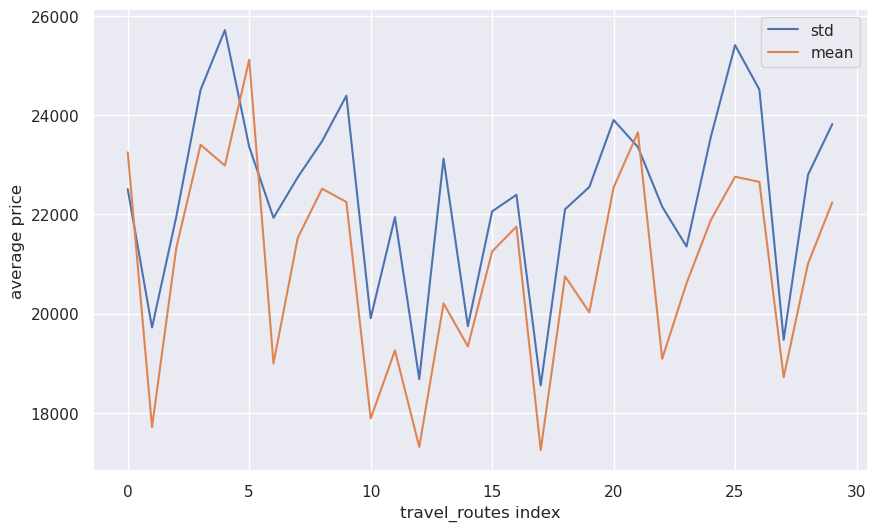

In [66]:
# Set figure size
plt.figure(figsize=(10,6))

plt.plot(df_stats.index,df_stats['std'], label = "std")
plt.plot(df_stats.index,df_stats['mean'], label = "mean")
plt.xlabel("travel_routes index")
plt.ylabel("average price")
plt.legend()
plt.show()

<Axes: >

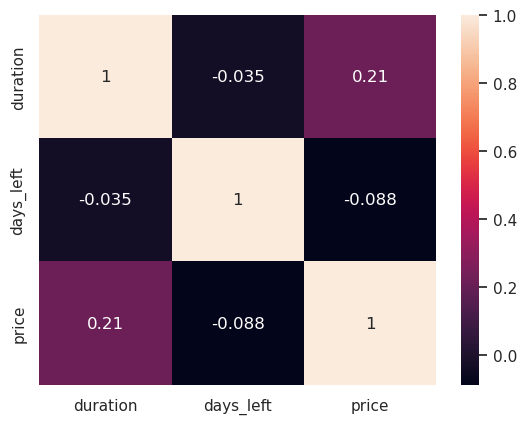

In [67]:
#correlation matrix of data
sn.heatmap(df4.corr(),annot=True)

In [68]:
df4['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [69]:
# saving the dataframe
#df4.to_csv('/content/gdrive/MyDrive/manufacturing_project/flight_processed_data_wo_stops.csv')

In [70]:
# Replace string values with integers
df5 = df4.replace({'stops': {'zero': 0, 'one': 1, 'two_or_more': 2}})

In [71]:
df5.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,travel_route
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai


In [72]:
df5['stops'].unique()

array([0, 1, 2])

<Axes: >

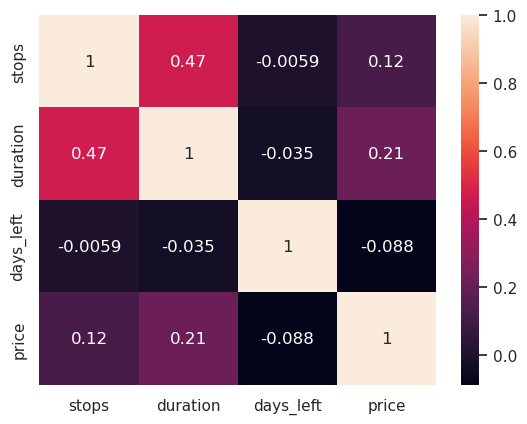

In [73]:
#correlation matrix of data
sn.heatmap(df5.corr(),annot=True)

In [74]:
df5.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,travel_route
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai


In [75]:
# group by 'class' column and calculate the statistics
df5.groupby('class')['price'].agg(['mean', 'std', 'min', 'max']).reset_index()

,class,mean,std,min,max
0,Business,52257.722393,12545.212709,12000,88950
1,Economy,6557.264190,3731.369079,1105,42349


**from above stats we can do one thing to do labal encoding in above case because price rang of economy and business are very different**
* so economy as 0 and business as 1 


In [76]:
# Replace string values with integers
df6 = df5.replace({'class': {'Economy': 0, 'Business': 1}})

In [77]:
df6.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,travel_route
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,Delhi-Mumbai


<Axes: >

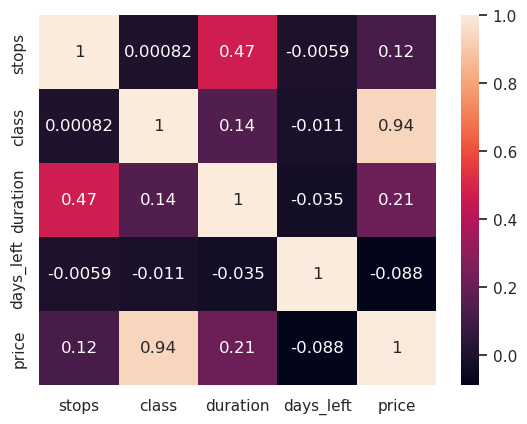

In [78]:
#correlation matrix of data
sn.heatmap(df6.corr(),annot=True)

<Axes: >

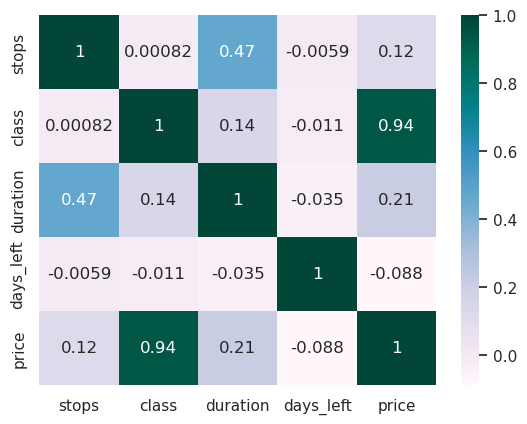

In [85]:
# Reverse the colormap to switch colors
cmap ="PuBuGn"

# Plot the heatmap with the modified color map
sn.heatmap(df6.corr(), annot=True, cmap=cmap)

In [100]:
df6.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,travel_route
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,Delhi-Mumbai


source_city  Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai
airline                                                           
AirAsia           3364     1498   4387       1844     2829    2176
Air_India        11893     9759  17056      11022    12277   18334
GO_FIRST          4498     1289   5724       2504     3590    5568
Indigo            7080     6746   8277       6215     7296    7506
SpiceJet          1255     1219   2524        332     1947    1734
Vistara          23713    17856  23276      18779    18053   25409


<Axes: xlabel='airline'>

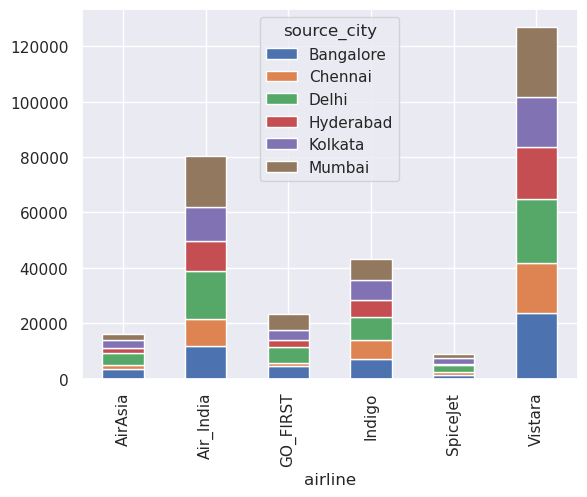

In [101]:
# Create a contingency table
contingency_table = pd.crosstab(df6['airline'], df6['source_city'])

# Print the contingency table
print(contingency_table)

# Create a stacked bar chart of the contingency table
contingency_table.plot(kind='bar', stacked=True)

source_city       Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai
destination_city                                                       
Bangalore                 0     6431  14011       7841     9782   12808
Chennai                6319        0  10756       6382     6632   10105
Delhi                 13744     9737      0       8506    10454   14807
Hyderabad              8847     6076   9317          0     7773   10453
Kolkata               10000     6912  11875       7932        0   12554
Mumbai                12893     9211  15285      10035    11351       0


<Axes: xlabel='destination_city'>

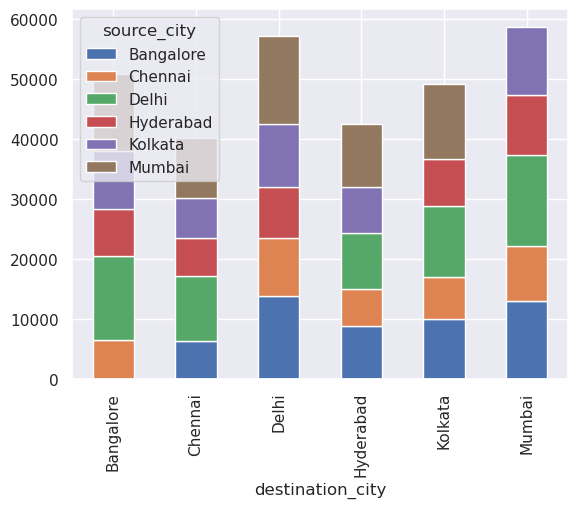

In [102]:
# Create a contingency table
contingency_table = pd.crosstab(df4['destination_city'], df4['source_city'])

# Print the contingency table
print(contingency_table)

# Create a stacked bar chart of the contingency table
contingency_table.plot(kind='bar', stacked=True)

source_city    Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai
arrival_time                                                        
Afternoon           6992     5137   8004       4813     5934    7230
Early_Morning       3101     1598   5262       1581     2152    1658
Evening            14420    10673  14563      10503    11209   16477
Late_Night          2672     1997   2143       2091     2409    2677
Morning            10398     7073  12991       8848     9579   13717
Night              14220    11889  18281      12860    14709   18968


<Axes: xlabel='arrival_time'>

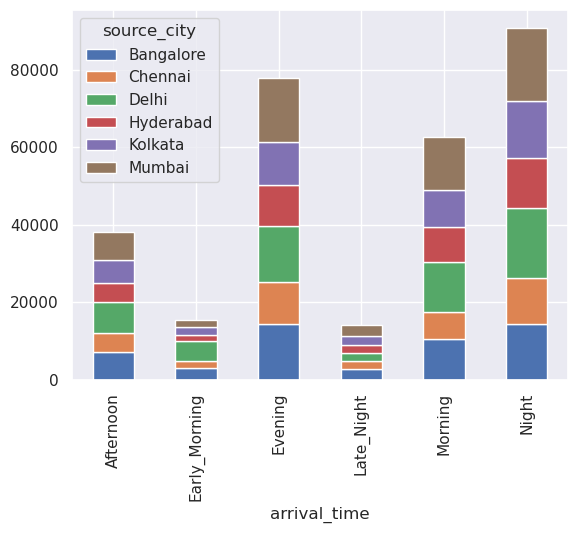

In [103]:
# Create a contingency table
contingency_table = pd.crosstab(df4['arrival_time'], df4['source_city'])

# Print the contingency table
print(contingency_table)

# Create a stacked bar chart of the contingency table
contingency_table.plot(kind='bar', stacked=True)

source_city     Bangalore  Chennai  Delhi  Hyderabad  Kolkata  Mumbai
departure_time                                                       
Afternoon            5136     5793  11229       7204     7820   10467
Early_Morning       13534     9183  12198       8478     8066   14919
Evening             14178     5371  16764       5984     9573   13026
Late_Night            457       72    357         38      114     268
Morning             12265    10444  13662       9895    11853   12563
Night                6233     7504   7034       9097     8566    9484


<Axes: xlabel='departure_time'>

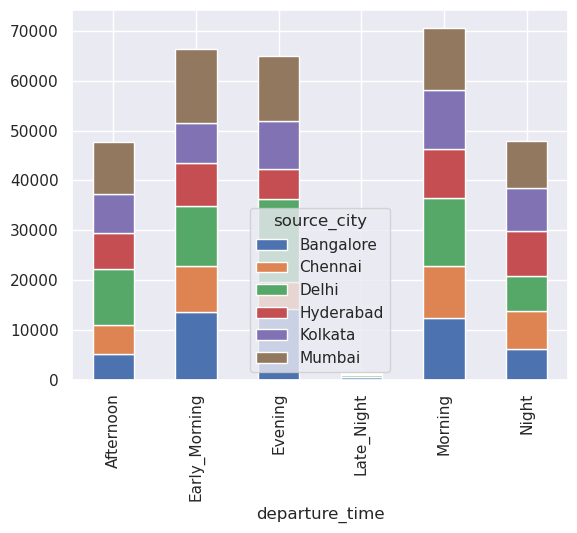

In [104]:
# Create a contingency table
contingency_table = pd.crosstab(df4['departure_time'], df4['source_city'])

# Print the contingency table
print(contingency_table)

# Create a stacked bar chart of the contingency table
contingency_table.plot(kind='bar', stacked=True)

In [105]:
df6.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,travel_route
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955,Delhi-Mumbai


In [108]:
df6.drop('travel_route',axis=1,inplace=True)

In [109]:
df6.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [110]:
# saving the dataframe
df6.to_csv('/home/growlt199/Downloads/manufacturing_project/data/flight_processed_data.csv')

In [93]:
print(df6['flight'].unique())

['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']


# **Model Training**

as fetures i wanted to take 
* **stops,class,days_left,duration** are numerical colums
* and do one hot encoding in other feature columns are **desparture_time,arrival_time, airline and traval_route (combination of source city and destination city)**


In [85]:
df4.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'travel_route'],
      dtype='object')

In [86]:
#removing colums which i dont want to use in model 
df5 =df4.drop(['flight','source_city','destination_city'],axis=1)

In [87]:
df5.head()

,airline,departure_time,stops,arrival_time,class,duration,days_left,price,travel_route
0,SpiceJet,Evening,0,Night,0,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,Early_Morning,0,Morning,0,2.33,1,5953,Delhi-Mumbai
2,AirAsia,Early_Morning,0,Early_Morning,0,2.17,1,5956,Delhi-Mumbai
3,Vistara,Morning,0,Afternoon,0,2.25,1,5955,Delhi-Mumbai
4,Vistara,Morning,0,Morning,0,2.33,1,5955,Delhi-Mumbai


In [88]:
# get dummy variables for multiple columns
dummy_cols = ['airline', 'departure_time','arrival_time','travel_route']
df5_dummy = pd.get_dummies(df5[dummy_cols])

# concatenate original DataFrame with dummy variable DataFrame
df5_concat = pd.concat([df5.drop(dummy_cols, axis=1), df5_dummy], axis=1)

# display result
df5_concat.head()


,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,travel_route_Kolkata-Bangalore,travel_route_Kolkata-Chennai,travel_route_Kolkata-Delhi,travel_route_Kolkata-Hyderabad,travel_route_Kolkata-Mumbai,travel_route_Mumbai-Bangalore,travel_route_Mumbai-Chennai,travel_route_Mumbai-Delhi,travel_route_Mumbai-Hyderabad,travel_route_Mumbai-Kolkata
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df5_concat = df5_concat.sample(frac = 1)
df5_concat.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,travel_route_Kolkata-Bangalore,travel_route_Kolkata-Chennai,travel_route_Kolkata-Delhi,travel_route_Kolkata-Hyderabad,travel_route_Kolkata-Mumbai,travel_route_Mumbai-Bangalore,travel_route_Mumbai-Chennai,travel_route_Mumbai-Delhi,travel_route_Mumbai-Hyderabad,travel_route_Mumbai-Kolkata
78538,1,0,4.92,11,8306,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10832,1,0,13.58,6,10208,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151096,1,0,5.33,34,3015,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
298045,1,1,8.33,49,55377,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64236,1,0,9.33,17,5817,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
df5_concat.reset_index(drop=True,inplace=True)
df5_concat

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,travel_route_Kolkata-Bangalore,travel_route_Kolkata-Chennai,travel_route_Kolkata-Delhi,travel_route_Kolkata-Hyderabad,travel_route_Kolkata-Mumbai,travel_route_Mumbai-Bangalore,travel_route_Mumbai-Chennai,travel_route_Mumbai-Delhi,travel_route_Mumbai-Hyderabad,travel_route_Mumbai-Kolkata
0,1,0,4.92,11,8306,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,13.58,6,10208,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,5.33,34,3015,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,8.33,49,55377,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,9.33,17,5817,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300139,1,0,9.67,11,6488,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
300140,1,0,8.50,39,3756,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
300141,2,0,10.00,18,7241,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
300142,1,0,10.92,37,7332,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#create x and y where x are features for the model and y as target
x = df5_concat.drop('price',axis=1)
y = df5_concat['price']

In [92]:
x.head()

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,travel_route_Kolkata-Bangalore,travel_route_Kolkata-Chennai,travel_route_Kolkata-Delhi,travel_route_Kolkata-Hyderabad,travel_route_Kolkata-Mumbai,travel_route_Mumbai-Bangalore,travel_route_Mumbai-Chennai,travel_route_Mumbai-Delhi,travel_route_Mumbai-Hyderabad,travel_route_Mumbai-Kolkata
0,1,0,4.92,11,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,13.58,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,5.33,34,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,8.33,49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,9.33,17,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [93]:
y.head()

0     8306
1    10208
2     3015
3    55377
4     5817
Name: price, dtype: int64

In [109]:
#use sklearn train test spilt for spilt our data in parts like training data and testing data 
from sklearn.model_selection import train_test_split

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.7, random_state =101, shuffle=True)

In [111]:
x_train.shape

(90043, 52)

In [112]:
x_test.shape

(210101, 52)

In [113]:
y_test.shape

(210101,)

In [114]:
y_train.shape

(90043,)

In [115]:
#import model from sklearn
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

#training model input as x_train and y_tarin
lm.fit(x_train,y_train)

#model is creted show give x test data as input and retuen predictd data 
predictions = lm.predict(x_test)

In [116]:
lm = LinearRegression()

In [117]:
#training model input as x_train and y_tarin
lm.fit(x_train,y_train)

LinearRegression()

# LinearRegression()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [118]:
lm.score(x_test,y_test)

0.9104812155935903

In [119]:
#finding error methods 
from sklearn import metrics

In [120]:
#model is creted show give x test data as input and retuen predictd data 
predictions = lm.predict(x_test)

In [121]:
#MAE
metrics.mean_absolute_error(y_test,predictions)

4510.598566693816

In [122]:
#MSE
metrics.mean_squared_error(y_test,predictions)

46039274.884156674

In [123]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test,predictions))

6785.224748242071

In [124]:
print(y_test.shape,predictions.shape)

(210101,) (210101,)


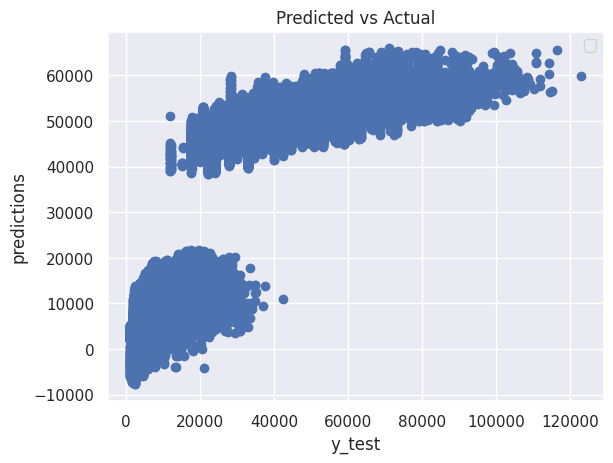

In [125]:
# Plotting the predicted values and actual values
plt.scatter(y_test,predictions)


# Customizing the plot
plt.title("Predicted vs Actual")
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
results=[]
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=(i/100), random_state =101, shuffle=False)

    lm = LinearRegression()
    lm.fit(x_train,y_train)
    results.append([i,lm.score(x_train,y_train)])

#printing results
for r in results:
    print(r)

In [ ]:
# create a Pandas DataFrame from the list
d_results_list = pd.DataFrame(results, columns=['test size', 'model_score'])

# print the DataFrame
print(d_results_list)

In [ ]:
# Set figure size
plt.figure(figsize=(10,6))

plt.plot(d_results_list['test size'],d_results_list['model_score'], label = "model_score")
plt.xlabel("test_size")
plt.ylabel("model_score")
plt.legend()
plt.show()